In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict
from statsmodels.tsa.stattools import adfuller, kpss
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Input file is: both_sexes.csv


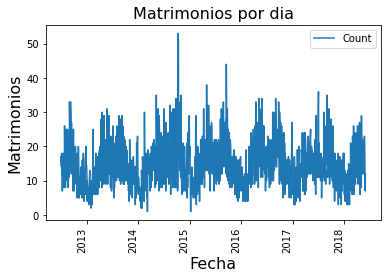

In [2]:
period=90

inputfile="both_sexes.csv"
print('Input file is:', inputfile)
df = pd.read_csv(inputfile)
df = df.set_index(pd.DatetimeIndex(df['RecDate']))
df.sort_index(ascending=True, inplace=True)
df["Count"] = 1
df = df["Count"]

df = df.groupby("RecDate").count()

matplotlib.rcParams['figure.figsize'] = [16,5]
plt.figure()
ax = df.plot(y='Count', rot=90)
ax.set_title("Matrimonios por dia", fontsize=16)
ax.set_ylabel("Matrimonios", fontsize=16)
ax.set_xlabel("Fecha", fontsize=16)
plt.legend(loc='best')
plt.show()

## Log + diferenciando con 5 dias

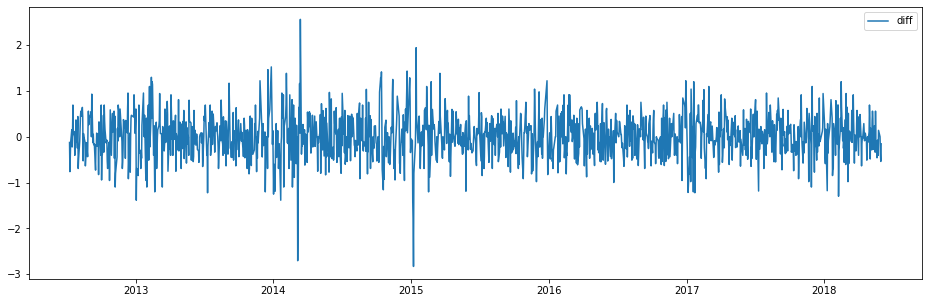

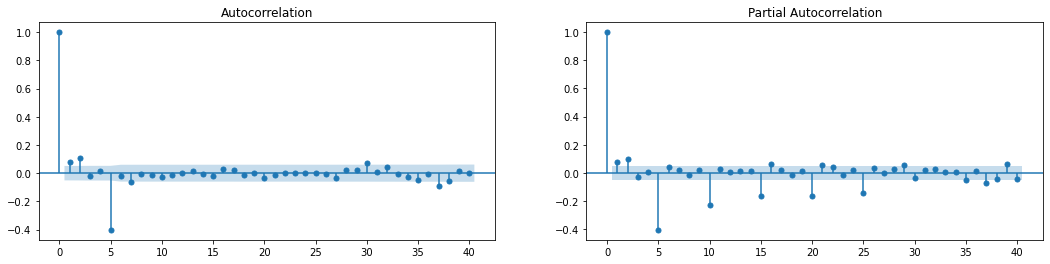

In [35]:
dataset = np.log(df)
diff = dataset.diff(5).dropna()

plt.plot(diff)
plt.legend(['diff'])
plt.show()

fig, ax = plt.subplots(1,2,figsize=(18,4))
plot_acf(diff, ax=ax[0], lags=40)
plot_pacf(diff, method='ywm', ax=ax[1], lags=40);

Primer modelo propuesto:

* para la parte MA => q=2
* para la parte AR => p=2
* d=0
* D=1 porque diferencié una vez a 5 pasos
* P=0
* Q=0 porque no veo componentes desde el lag 5
* s=5

In [24]:
model = sm.tsa.statespace.SARIMAX(np.log(df), order=(2,0,2), seasonal_order=(0,1,0,5))
fitted_model = model.fit(disp=False)
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Count   No. Observations:                 1468
Model:             SARIMAX(2, 0, 2)x(0, 1, [], 5)   Log Likelihood                -871.966
Date:                            Sat, 15 Oct 2022   AIC                           1753.933
Time:                                    09:45:03   BIC                           1780.374
Sample:                                         0   HQIC                          1763.795
                                           - 1468                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3292      0.019    -70.701      0.000      -1.366      -1.292
ar.L2         -0.6274      0.018    -34.184      0.000      -0.663      -0.591
ma.L1          1.6159      0.058     27.805      0.000       1.502       1.730
ma.L2          0.9998      0.072     13.957      0.000       0.859       1.140
sigma2         0.1915      0.014     13.543      0.000       0.164       0.219
===================================================================================
Ljung-Box (L1) (Q):                   2.42   Jarque-Bera (JB):               255.92
Prob(Q):                              0.12   Prob(JB):                         0.00
Heteroskedasticity (H):               0.73   Skew:                            -0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

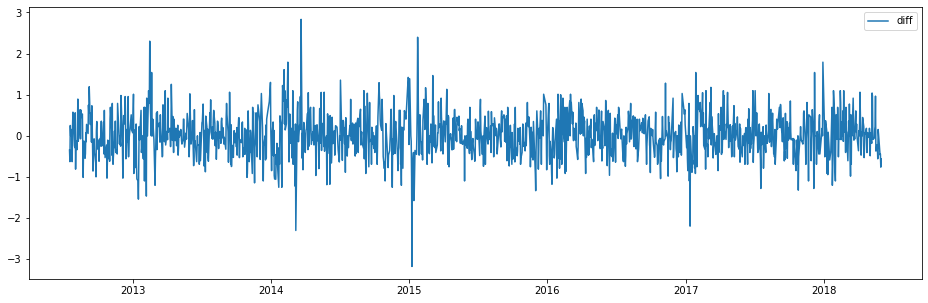

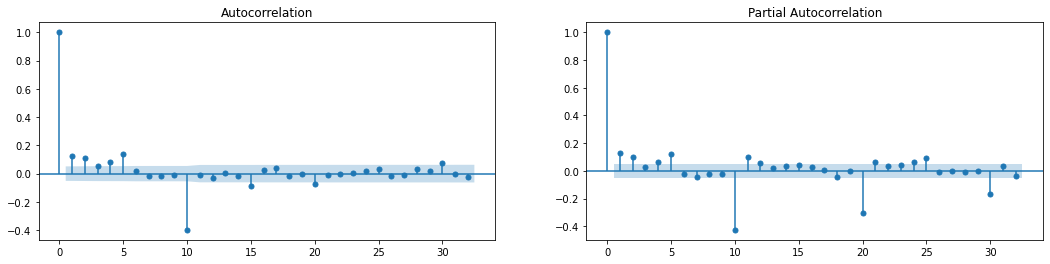

In [37]:
dataset = np.log(df)
diff = dataset.diff(10).dropna()

plt.plot(diff)
plt.legend(['diff'])
plt.show()

fig, ax = plt.subplots(1,2,figsize=(18,4))
plot_acf(diff, ax=ax[0])
plot_pacf(diff, method='ywm', ax=ax[1]);

In [68]:
model2 = sm.tsa.statespace.SARIMAX(np.log(df), order=(5,0,5), seasonal_order=(0,1,2,10))
fitted_model2 = model2.fit(disp=False)
fitted_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                   Count   No. Observations:                 1468
Model:             SARIMAX(5, 0, 5)x(0, 1, [1, 2], 10)   Log Likelihood                -720.003
Date:                                 Sat, 15 Oct 2022   AIC                           1466.006
Time:                                         18:38:26   BIC                           1534.709
Sample:                                              0   HQIC                          1491.637
                                                - 1468                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4439      3.934      0.367      0.714      -6.266       9.154
ar.L2         -0.4896      2.086     -0.235      0.814      -4.578       3.599
ar.L3         -0.5420      0.113     -4.808      0.000      -0.763      -0.321
ar.L4          1.4809      2.151      0.688      0.491      -2.735       5.697
ar.L5         -0.8969      3.856     -0.233      0.816      -8.455       6.661
ma.L1         -1.2743      3.929     -0.324      0.746      -8.975       6.427
ma.L2          0.3747      1.415      0.265      0.791      -2.399       3.148
ma.L3          0.5386      0.203      2.649      0.008       0.140       0.937
ma.L4         -1.3446      2.279     -0.590      0.555      -5.811       3.121
ma.L5          0.7447      3.192      0.233      0.816      -5.511       7.000
ma.S.L10      -0.9681      0.035    -27.823      0.000      -1.036      -0.900
ma.S.L20      -0.0264      0.028     -0.941      0.347      -0.082       0.029
sigma2         0.1526      0.005     28.242      0.000       0.142       0.163
===================================================================================
Ljung-Box (L1) (Q):                   0.85   Jarque-Bera (JB):               407.16
Prob(Q):                              0.36   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                            -0.62
Prob(H) (two-sided):                  0.20   Kurtosis:                         5.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

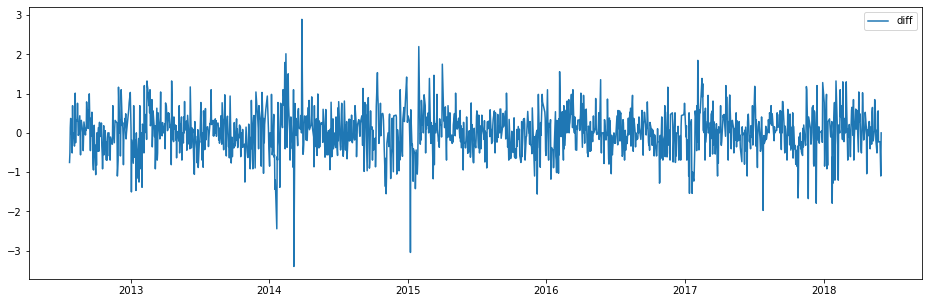

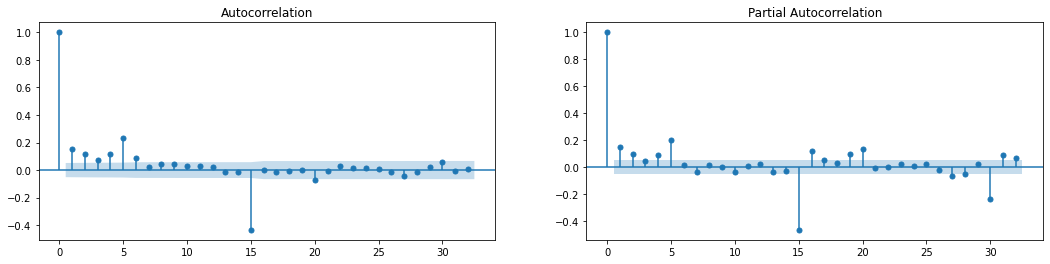

In [39]:
dataset = np.log(df)
diff = dataset.diff(15).dropna()

plt.plot(diff)
plt.legend(['diff'])
plt.show()

fig, ax = plt.subplots(1,2,figsize=(18,4))
plot_acf(diff, ax=ax[0])
plot_pacf(diff, method='ywm', ax=ax[1]);

In [40]:
model3 = sm.tsa.statespace.SARIMAX(np.log(df), order=(6,0,5), seasonal_order=(0,1,5,15))
fitted_model3 = model3.fit(disp=False)
fitted_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Count   No. Observations:                 1468
Model:             SARIMAX(6, 0, 5)x(0, 1, 5, 15)   Log Likelihood                -720.482
Date:                            Sat, 15 Oct 2022   AIC                           1474.964
Time:                                    09:55:00   BIC                           1564.748
Sample:                                         0   HQIC                          1508.465
                                           - 1468                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0984      0.055     -1.783      0.075      -0.206       0.010
ar.L2          0.0589      0.024      2.407      0.016       0.011       0.107
ar.L3         -0.0717      0.025     -2.902      0.004      -0.120      -0.023
ar.L4          0.1729      0.026      6.588      0.000       0.121       0.224
ar.L5          0.9387      0.031     29.972      0.000       0.877       1.000
ar.L6         -0.0103      0.033     -0.315      0.753      -0.074       0.054
ma.L1          0.2611      0.050      5.269      0.000       0.164       0.358
ma.L2          0.0926      0.033      2.839      0.005       0.029       0.157
ma.L3          0.1810      0.034      5.317      0.000       0.114       0.248
ma.L4         -0.0545      0.036     -1.508      0.132      -0.125       0.016
ma.L5         -0.7347      0.035    -20.720      0.000      -0.804      -0.665
ma.S.L15      -1.0392      0.028    -36.479      0.000      -1.095      -0.983
ma.S.L30       0.1159      0.036      3.227      0.001       0.046       0.186
ma.S.L45      -0.0485      0.040     -1.222      0.222      -0.126       0.029
ma.S.L60      -0.0508      0.042     -1.217      0.224      -0.133       0.031
ma.S.L75       0.0402      0.030      1.355      0.176      -0.018       0.098
sigma2         0.1525      0.005     32.170      0.000       0.143       0.162
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               346.45
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.84   Skew:                            -0.59
Prob(H) (two-sided):                  0.06   Kurtosis:                         5.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Analisis de Residuos

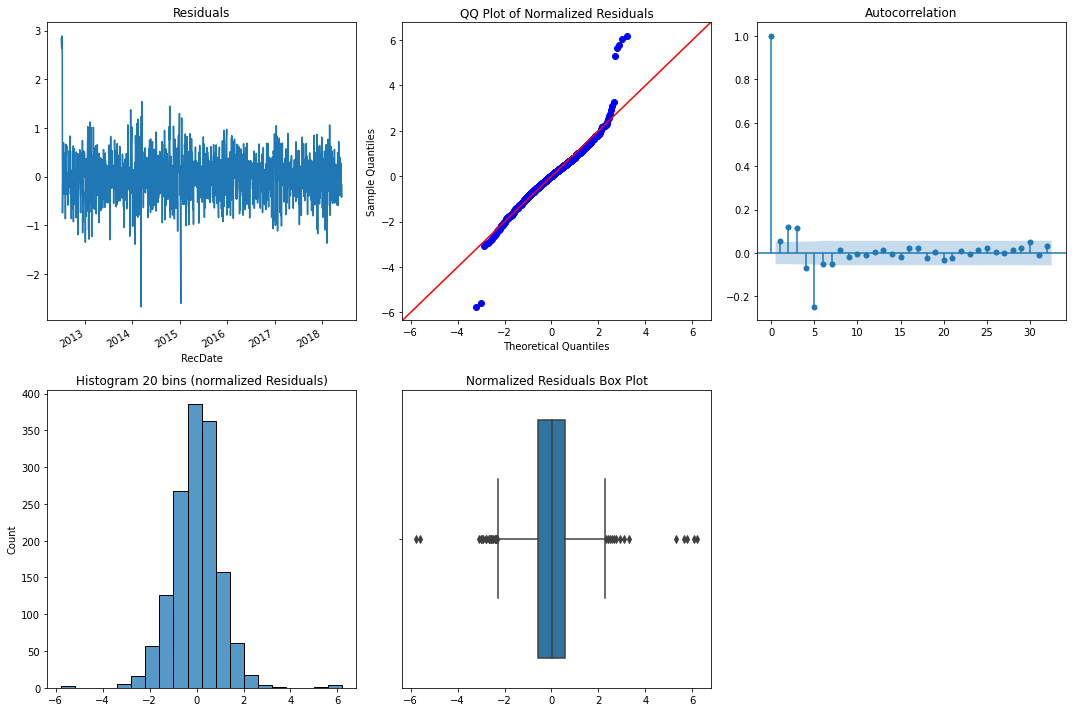

In [49]:
resid = fitted_model.resid
resid_norm = (resid-resid.mean())/resid.std()
bins=20

#Plot
fig, ax = plt.subplots(2,3,figsize=(15,10))
resid.plot(ax=ax[0,0])
ax[0,0].set_title('Residuals')
sm.qqplot(resid_norm, scale=1, line="45", ax=ax[0,1])
ax[0,1].set_title('QQ Plot of Normalized Residuals')
sm.graphics.tsa.plot_acf(resid, ax=ax[0,2])
sns.histplot(resid_norm, bins=bins, ax=ax[1,0])
ax[1,0].set_title(f'Histogram {bins} bins (normalized Residuals)')
sns.boxplot(resid_norm, ax=ax[1,1])
ax[1,1].set_title('Normalized Residuals Box Plot')
plt.delaxes(ax[1][2])
plt.tight_layout()
plt.show()

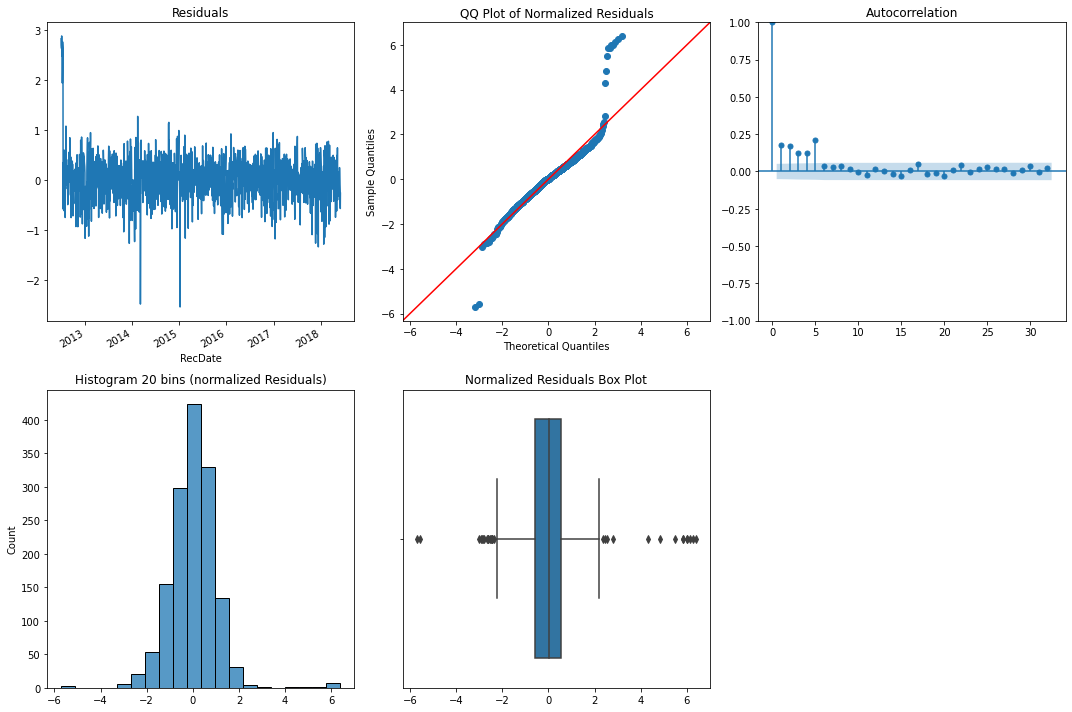

In [69]:
resid = fitted_model2.resid
resid_norm = (resid-resid.mean())/resid.std()
bins=20

#Plot
fig, ax = plt.subplots(2,3,figsize=(15,10))
resid.plot(ax=ax[0,0])
ax[0,0].set_title('Residuals')
sm.qqplot(resid_norm, scale=1, line="45", ax=ax[0,1])
ax[0,1].set_title('QQ Plot of Normalized Residuals')
sm.graphics.tsa.plot_acf(resid, ax=ax[0,2])
sns.histplot(resid_norm, bins=bins, ax=ax[1,0])
ax[1,0].set_title(f'Histogram {bins} bins (normalized Residuals)')
sns.boxplot(resid_norm, ax=ax[1,1])
ax[1,1].set_title('Normalized Residuals Box Plot')
plt.delaxes(ax[1][2])
plt.tight_layout()
plt.show()

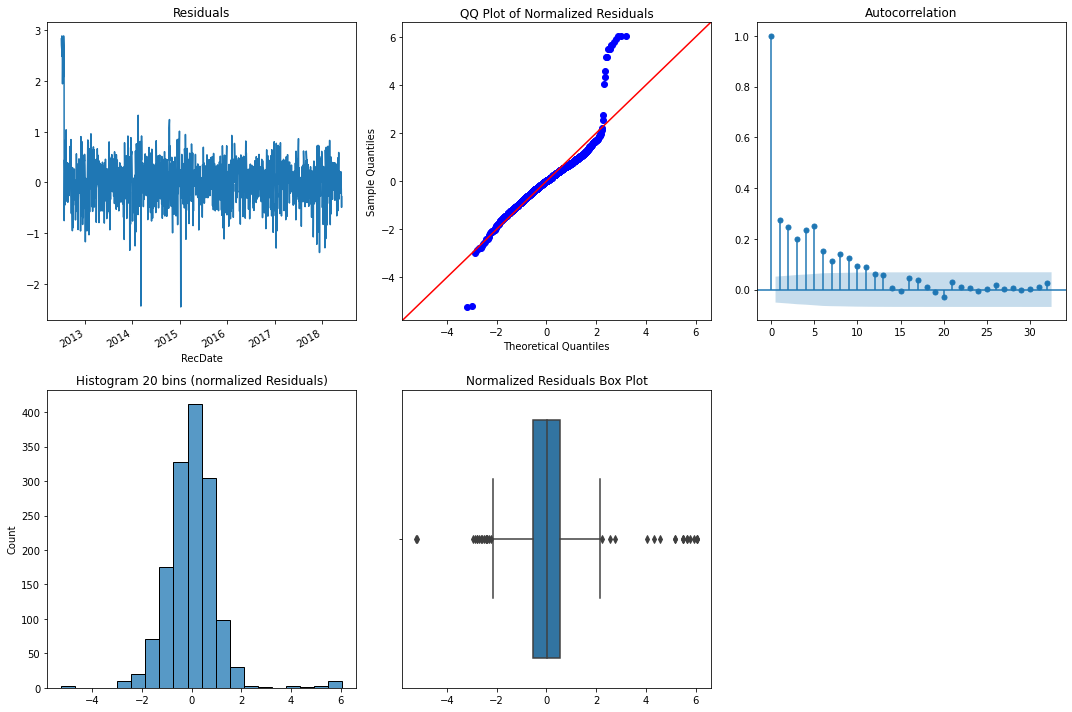

In [51]:
resid = fitted_model3.resid
resid_norm = (resid-resid.mean())/resid.std()
bins=20

#Plot
fig, ax = plt.subplots(2,3,figsize=(15,10))
resid.plot(ax=ax[0,0])
ax[0,0].set_title('Residuals')
sm.qqplot(resid_norm, scale=1, line="45", ax=ax[0,1])
ax[0,1].set_title('QQ Plot of Normalized Residuals')
sm.graphics.tsa.plot_acf(resid, ax=ax[0,2])
sns.histplot(resid_norm, bins=bins, ax=ax[1,0])
ax[1,0].set_title(f'Histogram {bins} bins (normalized Residuals)')
sns.boxplot(resid_norm, ax=ax[1,1])
ax[1,1].set_title('Normalized Residuals Box Plot')
plt.delaxes(ax[1][2])
plt.tight_layout()
plt.show()

# Predicciones

In [58]:
original_data = np.log(df)
original_data = original_data.reset_index()
original_data["RecDate"] = pd.to_datetime(original_data["RecDate"], format='%Y-%m-%d')
original_data.set_index("RecDate")

,Count
RecDate,
2012-07-02,2.833213
2012-07-03,2.708050
2012-07-05,2.639057
2012-07-06,2.890372
2012-07-09,2.484907
...,...
2018-05-25,3.135494
2018-05-29,2.484907
2018-05-30,2.197225


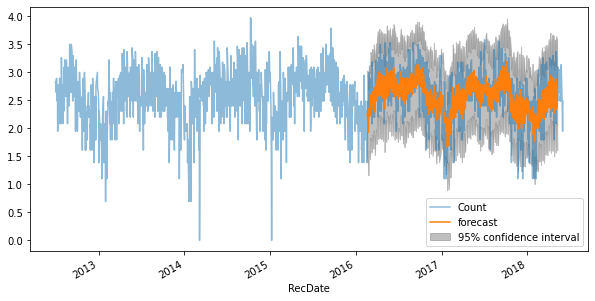

In [70]:
original_data = np.log(df)
fig, ax = plt.subplots(figsize=[10,5])
ax = original_data.plot(ax=ax, alpha=0.5)
fig = plot_predict(fitted_model2, start=900, end=1450, ax=ax, plot_insample=False)
# fig = plot_predict(fitted_model2, start=pd.to_datetime('2016-04-26'), end=pd.to_datetime('2017-04-26'), ax=ax, plot_insample=False)

plt.show()